In [45]:
#longitude Latitude Depth
#import dependencies

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy
from sompy.visualization.bmuhits import BmuHitsView
import sys
np.set_printoptions(threshold=sys.maxsize)

In [21]:
dFrame = pd.read_csv('somDatasetLLD.csv')
quakeLLDRecArr  = dFrame.to_records(index=False)
quakeLLD = np.array(quakeLLDRecArr.tolist())

quakeLLD

array([[172.16794, -43.52731,  11.0426 ],
       [172.32367, -43.55426,  10.0257 ],
       [172.38512, -43.6585 ,   7.8273 ],
       ...,
       [171.88284, -43.59351,   5.     ],
       [172.41629, -43.64249,  14.2303 ],
       [171.75114, -43.56247,   5.     ]])

[50, 50]

In [6]:
mapsize = [50,50] #
som = sompy.SOMFactory.build(quakeLLD, 
                             mapsize, 
                             mask=None, 
                             mapshape='planar', 
                             lattice='rect', 
                             normalization='var', 
                             initialization='pca', 
                             neighborhood='gaussian', 
                             training='batch', 
                             name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods

som.train(n_job=1, shared_memory = 'no', verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 0.025000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 23

 epoch: 1 ---> elapsed time:  0.297000, quantization error: 0.755823

 epoch: 2 ---> elapsed time:  0.308000, quantization error: 0.406072

 epoch: 3 ---> elapsed time:  0.338000, quantization error: 0.328761

 epoch: 4 ---> elapsed time:  0.333000, quantization error: 0.304588

 epoch: 5 ---> elapsed time:  0.308000, quantization error: 0.293935

 epoch: 6 ---> elapsed time:  0.326000, quantization error: 0.284514

 epoch: 7 ---> elapsed time:  0.306000, quantization error: 0.275931

 epoch: 8 ---> elapsed time:  0.320000, quantization error: 0.267256

 epoch: 9 ---> elapsed time:  0.340000, quantization error: 0.258819

 epoch: 10 ---> elapsed time:  0.303000, quantization error: 0.250066

 epoch: 11 ---> elapsed time:  0.305000, quantization error: 0.241260

 epoch: 12 ---> elapsed time:  0.375000, quantization error: 0.232396

 epoch: 13 --

In [40]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v

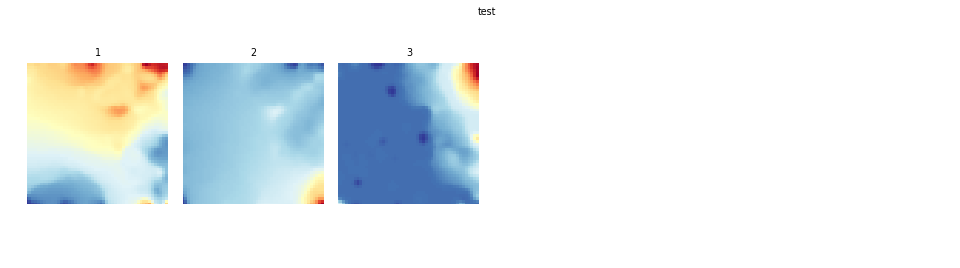

In [43]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1,2], cmap=None, col_sz=6) #which_dim='all' default

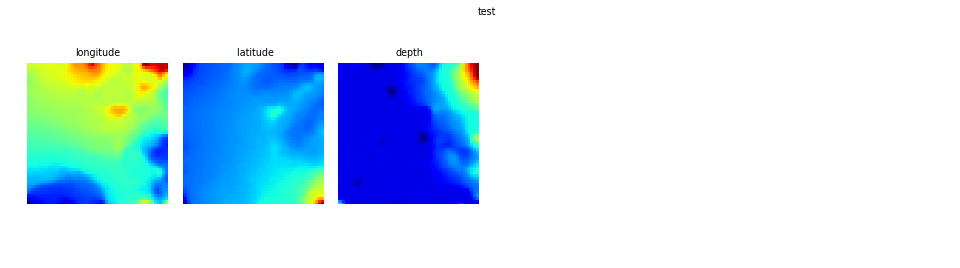

In [44]:
som.component_names = ['longitude',' latitude','depth']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

In [11]:
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
len(getattr(som, 'cluster_labels'))

2500

C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


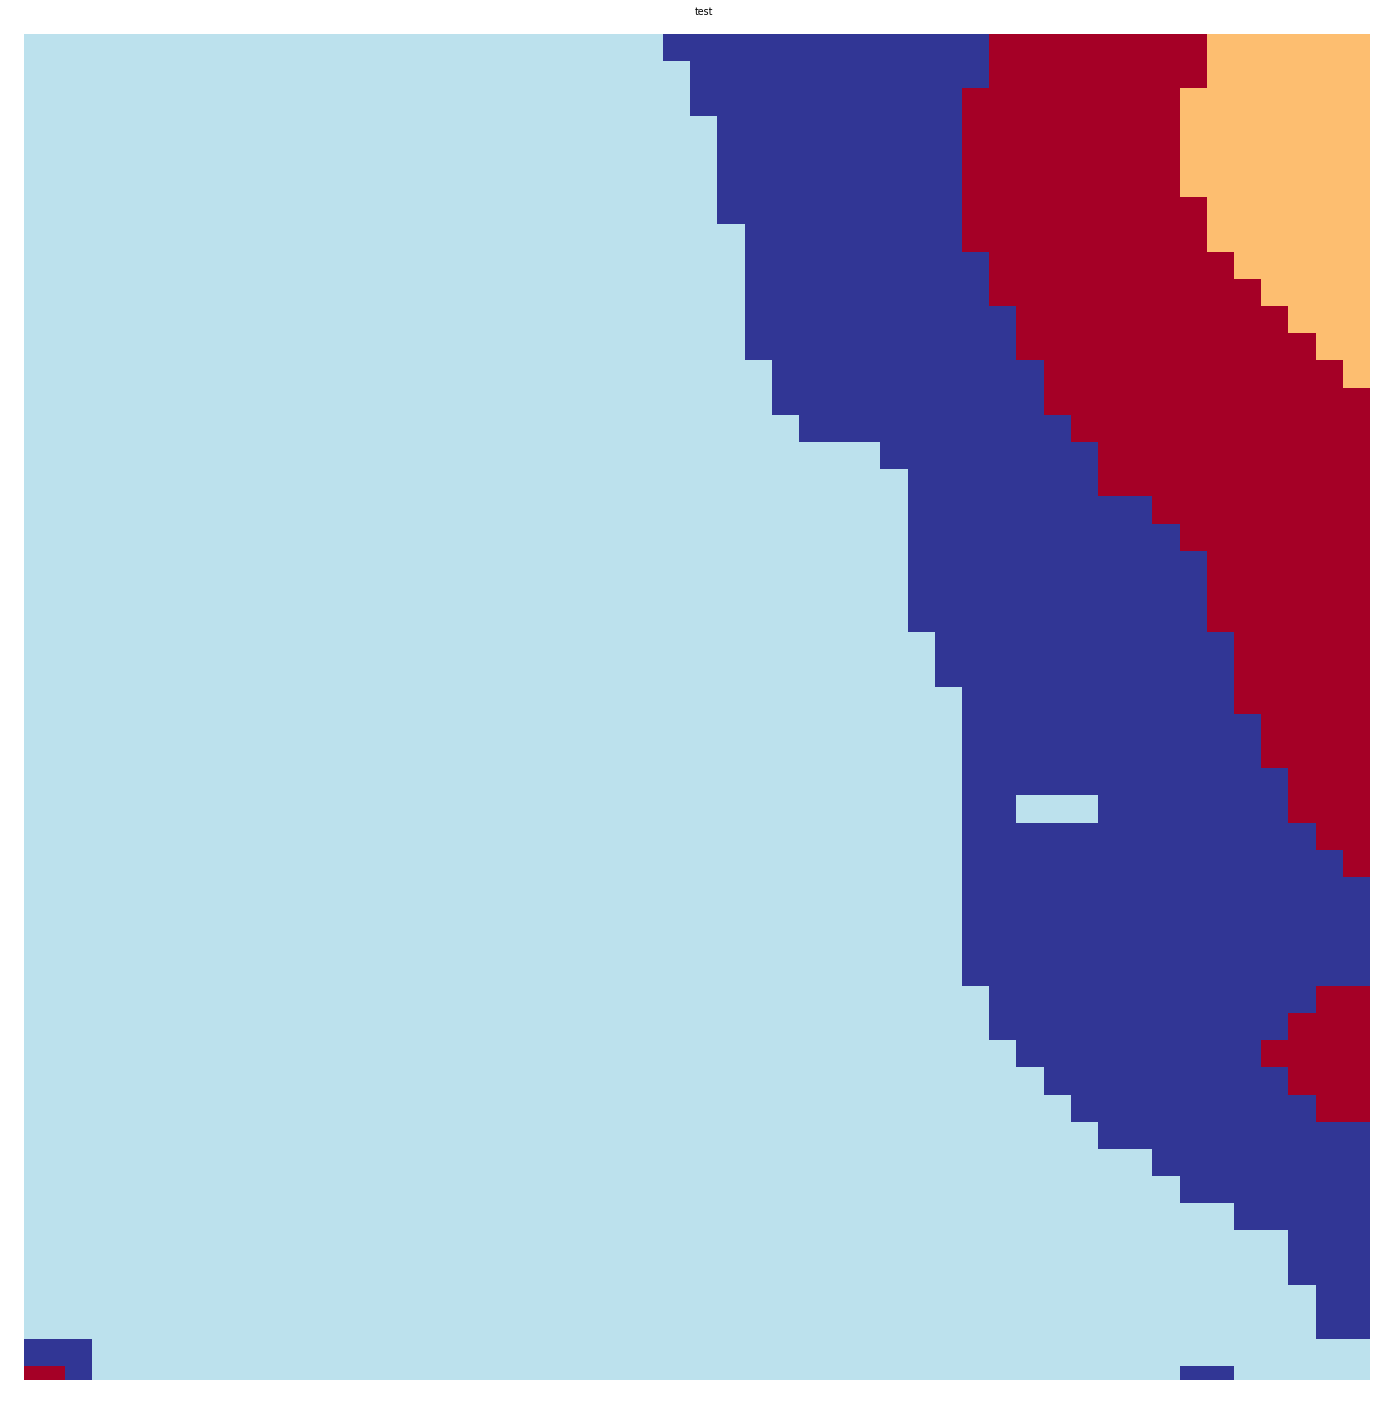

In [14]:
v.show(som, what='cluster')

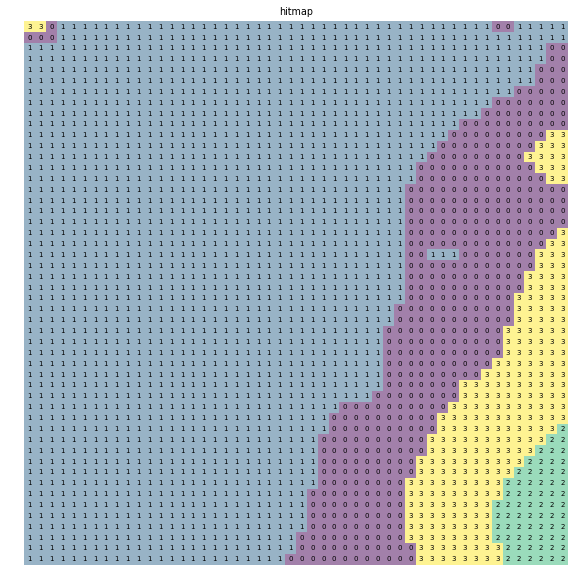

In [15]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=10, show_text=True)
h.show(som)

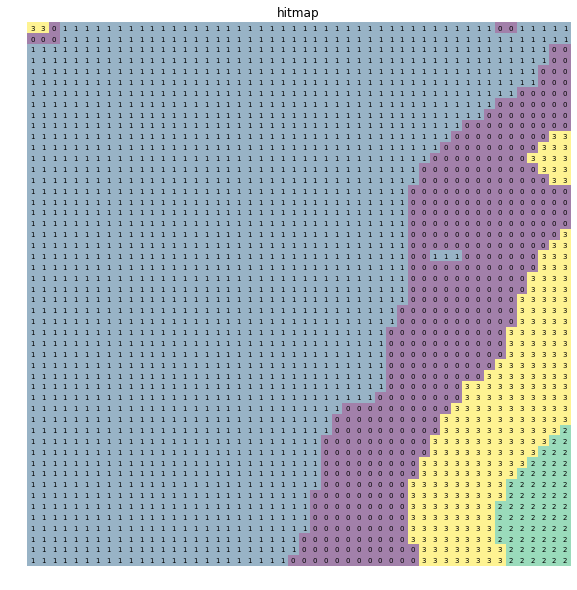

In [16]:
h2 = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=12, show_text=True)
h2.show(som)

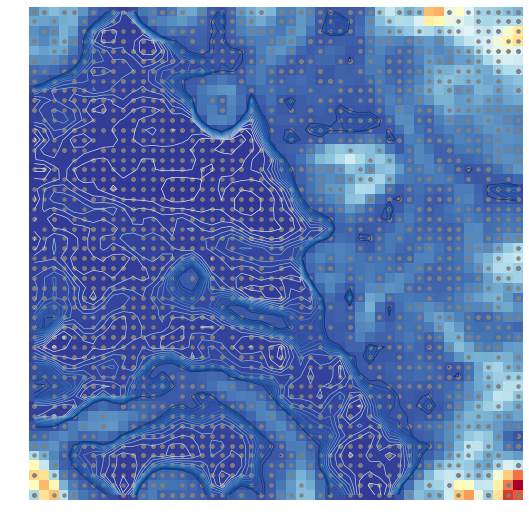

In [17]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

In [35]:
map_labels = som.cluster(9)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]]) # mapping labels from grid to original data

In [36]:
map_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 4, 4, 4, 4, 4, 4, 1, 1,
       6, 7, 7, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 2, 4, 4,
       4, 4, 4, 1, 1, 6, 6, 7, 7, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 8, 8, 8, 8, 8,
       8, 8, 2, 2, 4, 4, 4, 4, 1, 1, 1, 6, 6, 7, 7, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5,
       5, 5, 8, 8, 8, 8, 2, 2, 2, 4, 4, 4, 4, 4, 1, 1, 1, 6, 6, 7, 7, 7,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 5, 5, 5, 5, 8, 8, 8, 8, 2, 2, 4, 4, 4, 4, 4, 1, 1,
       1, 6, 6, 6, 7, 7, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 8, 8, 8, 2, 2, 4,
       4, 4, 4, 4, 1, 1, 1, 6, 6, 6, 7, 7, 3, 3, 0,

In [24]:
len(map_labels)

2500

In [37]:
max(map_labels)

8

In [48]:
import matplotlib.pyplot as plt
plt.imshow(X, cmap="gray")
plt.show()

In [49]:
print(map_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 8 8 8 8 8 8 8 8 8 2 4
 4 4 4 4 4 1 1 6 7 7 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 5 5 5 8 8 8 8 8 8 8 8 2 4 4 4 4 4 1 1 6 6 7 7 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 8 8 8 8 8 8 8 2 2 4 4 4 4 1 1 1 6 6 7 7 3
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 8 8 8 8 2 2 2
 4 4 4 4 4 1 1 1 6 6 7 7 7 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 5 5 5 5 5 8 8 8 8 2 2 4 4 4 4 4 1 1 1 6 6 6 7 7 3 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 8 8 8 2 2 4 4 4 4 4 1 1 1 6 6 6
 7 7 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 8 8 8
 2 2 4 4 4 4 4 4 1 1 6 6 6 6 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 5 5 5 5 5 5 8 8 8 2 2 2 4 4 4 4 4 1 1 1 6 6 6 7 7 7 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 8 8 8 2 2 2 4 4 4 4 4 1 1 1
 6 6 6 6 6 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 8 8
 8 8 2 2 2 4 4 4 4 4 4 1 

In [30]:
data_labels

array([1, 7, 3, 1, 5, 7, 4, 8, 3, 6, 7, 0, 1, 3, 7, 7, 1, 1, 5, 4, 5, 0,
       0, 1, 6, 0, 3, 2, 7, 7, 5, 7, 7, 7, 0, 7, 3, 5, 7, 7, 2, 1, 3, 0,
       0, 7, 5, 6, 3, 0, 0, 0, 0, 4, 7, 3, 0, 7, 5, 1, 1, 1, 5, 1, 0, 0,
       0, 0, 3, 8, 3, 1, 1, 3, 7, 5, 7, 5, 0, 1, 7, 0, 0, 6, 5, 7, 4, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 2, 8, 0, 5, 3, 0, 0, 0, 1, 1,
       0, 3, 4, 3, 2, 0, 0, 7, 1, 4, 0, 0, 3, 0, 0, 8, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0, 1, 0, 0, 1, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 0, 0, 2, 1, 3, 0, 7, 0, 0, 0, 0, 0, 1, 3, 1, 4, 4,
       0, 0, 3, 5, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 4, 0, 3, 0, 0, 0, 4, 0, 3, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 5, 5, 0, 1, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 5, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 8, 8, 5, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0,

In [31]:
len(data_labels)

3290

In [32]:
max(data_labels)

8

In [34]:
min(data_labels)

0